In [1]:
from unityagents import UnityEnvironment
import copy
from time import perf_counter

In [2]:
from model import get_model
from helpers import train_model, save_model, plot_losses, plot_scores, test_model, load_model

In [3]:
# hyperparameters
lr = 0.0003
gamma = 0.9

batch_size = 10
buffer_size = 5000

c = 750
c_step = 0
e = 0.01
a = 0.6
b = 0.4
input_depth = 37
hidden0 = 128
hidden1 = 128
hidden2 = 128
output_depth = 4

replay = []

In [4]:
model, loss_fn, optimizer = get_model(input_depth, hidden0, hidden1, hidden2, output_depth, lr)
model_ = copy.deepcopy(model)

In [5]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# train model
epochs = 3000
epsilon = 1.0  # decays over the course of training
losses = []
scores = []
average_scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, b, c, c_step)
metrics = (losses, scores, average_scores)

start = perf_counter()
train_model(hyperparams, actor_env, training, exp_replay, double_per,
            metrics, early_stop_target=13.1, early_stop_threshold=5)
save_model(model, optimizer, replay, 'checkpoint-{}.pt'.format(epochs))
end = perf_counter()
print((end - start))

epoch 0, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 1, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 2, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 3, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 4, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 5, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -2.0
epoch 6, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 7, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 8, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 9, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 10, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 11, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 12, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 13, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 14, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 15, loss:

epoch 123, loss: 0.01888, epsilon: 0.96, b: 0.42, avg: -0.11 :: 1.0
epoch 124, loss: 0.01905, epsilon: 0.96, b: 0.42, avg: -0.10 :: 1.0
epoch 125, loss: 0.01924, epsilon: 0.96, b: 0.43, avg: -0.10 :: 0.0
epoch 126, loss: 0.01933, epsilon: 0.96, b: 0.43, avg: -0.10 :: 0.0
epoch 127, loss: 0.01948, epsilon: 0.96, b: 0.43, avg: -0.11 :: -1.0
epoch 128, loss: 0.01949, epsilon: 0.96, b: 0.43, avg: -0.12 :: -1.0
epoch 129, loss: 0.01955, epsilon: 0.96, b: 0.43, avg: -0.12 :: 0.0
epoch 130, loss: 0.01962, epsilon: 0.96, b: 0.43, avg: -0.11 :: -1.0
epoch 131, loss: 0.01970, epsilon: 0.96, b: 0.43, avg: -0.12 :: 0.0
epoch 132, loss: 0.01977, epsilon: 0.96, b: 0.43, avg: -0.11 :: -2.0
epoch 133, loss: 0.01975, epsilon: 0.96, b: 0.43, avg: -0.11 :: -1.0
epoch 134, loss: 0.01985, epsilon: 0.96, b: 0.43, avg: -0.12 :: 0.0
epoch 135, loss: 0.01980, epsilon: 0.96, b: 0.43, avg: -0.13 :: -1.0
epoch 136, loss: 0.01976, epsilon: 0.96, b: 0.43, avg: -0.14 :: 0.0
epoch 137, loss: 0.01976, epsilon: 0.96, b

epoch 244, loss: 0.02931, epsilon: 0.93, b: 0.45, avg: 0.17 :: -1.0
epoch 245, loss: 0.02936, epsilon: 0.93, b: 0.45, avg: 0.17 :: 1.0
epoch 246, loss: 0.02942, epsilon: 0.93, b: 0.45, avg: 0.19 :: 2.0
epoch 247, loss: 0.02954, epsilon: 0.93, b: 0.45, avg: 0.16 :: -1.0
epoch 248, loss: 0.02960, epsilon: 0.93, b: 0.45, avg: 0.19 :: 2.0
epoch 249, loss: 0.02973, epsilon: 0.93, b: 0.45, avg: 0.22 :: 1.0
epoch 250, loss: 0.02976, epsilon: 0.93, b: 0.45, avg: 0.27 :: 3.0
epoch 251, loss: 0.02986, epsilon: 0.92, b: 0.45, avg: 0.25 :: 0.0
epoch 252, loss: 0.02995, epsilon: 0.92, b: 0.45, avg: 0.25 :: 0.0
epoch 253, loss: 0.03005, epsilon: 0.92, b: 0.45, avg: 0.25 :: 1.0
epoch 254, loss: 0.03021, epsilon: 0.92, b: 0.45, avg: 0.26 :: 1.0
epoch 255, loss: 0.03029, epsilon: 0.92, b: 0.45, avg: 0.24 :: -2.0
epoch 256, loss: 0.03037, epsilon: 0.92, b: 0.45, avg: 0.22 :: 0.0
epoch 257, loss: 0.03042, epsilon: 0.92, b: 0.45, avg: 0.22 :: 1.0
epoch 258, loss: 0.03048, epsilon: 0.92, b: 0.45, avg: 0.22

epoch 366, loss: 0.03769, epsilon: 0.89, b: 0.47, avg: 0.48 :: 1.0
epoch 367, loss: 0.03772, epsilon: 0.89, b: 0.47, avg: 0.47 :: 1.0
epoch 368, loss: 0.03772, epsilon: 0.89, b: 0.47, avg: 0.49 :: 3.0
epoch 369, loss: 0.03773, epsilon: 0.89, b: 0.47, avg: 0.46 :: -2.0
epoch 370, loss: 0.03775, epsilon: 0.89, b: 0.47, avg: 0.45 :: 1.0
epoch 371, loss: 0.03779, epsilon: 0.89, b: 0.47, avg: 0.47 :: 2.0
epoch 372, loss: 0.03783, epsilon: 0.89, b: 0.47, avg: 0.48 :: 2.0
epoch 373, loss: 0.03784, epsilon: 0.89, b: 0.47, avg: 0.49 :: 1.0
epoch 374, loss: 0.03787, epsilon: 0.89, b: 0.47, avg: 0.49 :: 1.0
epoch 375, loss: 0.03790, epsilon: 0.89, b: 0.48, avg: 0.45 :: -1.0
epoch 376, loss: 0.03792, epsilon: 0.89, b: 0.48, avg: 0.45 :: 0.0
epoch 377, loss: 0.03795, epsilon: 0.89, b: 0.48, avg: 0.48 :: 4.0
epoch 378, loss: 0.03799, epsilon: 0.89, b: 0.48, avg: 0.46 :: 1.0
epoch 379, loss: 0.03801, epsilon: 0.89, b: 0.48, avg: 0.45 :: -1.0
epoch 380, loss: 0.03805, epsilon: 0.89, b: 0.48, avg: 0.47

epoch 489, loss: 0.04000, epsilon: 0.85, b: 0.50, avg: 0.91 :: 2.0
epoch 490, loss: 0.04001, epsilon: 0.85, b: 0.50, avg: 0.92 :: 1.0
epoch 491, loss: 0.04000, epsilon: 0.85, b: 0.50, avg: 0.93 :: 1.0
epoch 492, loss: 0.04001, epsilon: 0.85, b: 0.50, avg: 0.94 :: 1.0
epoch 493, loss: 0.04004, epsilon: 0.85, b: 0.50, avg: 0.95 :: 0.0
epoch 494, loss: 0.04004, epsilon: 0.85, b: 0.50, avg: 0.96 :: 1.0
epoch 495, loss: 0.04005, epsilon: 0.85, b: 0.50, avg: 0.96 :: 1.0
epoch 496, loss: 0.04008, epsilon: 0.85, b: 0.50, avg: 0.96 :: 2.0
epoch 497, loss: 0.04008, epsilon: 0.85, b: 0.50, avg: 0.98 :: 3.0
epoch 498, loss: 0.04008, epsilon: 0.85, b: 0.50, avg: 0.98 :: 1.0
epoch 499, loss: 0.04009, epsilon: 0.85, b: 0.50, avg: 0.98 :: -1.0
epoch 500, loss: 0.04012, epsilon: 0.85, b: 0.50, avg: 0.97 :: 1.0
epoch 501, loss: 0.04012, epsilon: 0.85, b: 0.50, avg: 0.96 :: -1.0
epoch 502, loss: 0.04014, epsilon: 0.85, b: 0.50, avg: 0.93 :: -1.0
epoch 503, loss: 0.04014, epsilon: 0.85, b: 0.50, avg: 0.95

epoch 612, loss: 0.04126, epsilon: 0.82, b: 0.52, avg: 1.05 :: 2.0
epoch 613, loss: 0.04127, epsilon: 0.82, b: 0.52, avg: 1.07 :: 4.0
epoch 614, loss: 0.04127, epsilon: 0.82, b: 0.52, avg: 1.09 :: 1.0
epoch 615, loss: 0.04129, epsilon: 0.82, b: 0.52, avg: 1.13 :: 4.0
epoch 616, loss: 0.04130, epsilon: 0.82, b: 0.52, avg: 1.13 :: 0.0
epoch 617, loss: 0.04129, epsilon: 0.81, b: 0.52, avg: 1.11 :: -1.0
epoch 618, loss: 0.04129, epsilon: 0.81, b: 0.52, avg: 1.10 :: 0.0
epoch 619, loss: 0.04129, epsilon: 0.81, b: 0.52, avg: 1.09 :: -1.0
epoch 620, loss: 0.04128, epsilon: 0.81, b: 0.52, avg: 1.06 :: 1.0
epoch 621, loss: 0.04128, epsilon: 0.81, b: 0.52, avg: 1.09 :: 2.0
epoch 622, loss: 0.04129, epsilon: 0.81, b: 0.52, avg: 1.10 :: 2.0
epoch 623, loss: 0.04133, epsilon: 0.81, b: 0.52, avg: 1.13 :: 4.0
epoch 624, loss: 0.04133, epsilon: 0.81, b: 0.52, avg: 1.13 :: 0.0
epoch 625, loss: 0.04133, epsilon: 0.81, b: 0.53, avg: 1.16 :: 1.0
epoch 626, loss: 0.04134, epsilon: 0.81, b: 0.53, avg: 1.18 

epoch 735, loss: 0.04245, epsilon: 0.78, b: 0.55, avg: 1.57 :: 1.0
epoch 736, loss: 0.04245, epsilon: 0.78, b: 0.55, avg: 1.52 :: 0.0
epoch 737, loss: 0.04245, epsilon: 0.78, b: 0.55, avg: 1.52 :: 2.0
epoch 738, loss: 0.04247, epsilon: 0.78, b: 0.55, avg: 1.50 :: 1.0
epoch 739, loss: 0.04248, epsilon: 0.78, b: 0.55, avg: 1.56 :: 7.0
epoch 740, loss: 0.04248, epsilon: 0.78, b: 0.55, avg: 1.55 :: 2.0
epoch 741, loss: 0.04249, epsilon: 0.78, b: 0.55, avg: 1.63 :: 6.0
epoch 742, loss: 0.04250, epsilon: 0.78, b: 0.55, avg: 1.65 :: 3.0
epoch 743, loss: 0.04251, epsilon: 0.78, b: 0.55, avg: 1.64 :: 3.0
epoch 744, loss: 0.04251, epsilon: 0.78, b: 0.55, avg: 1.61 :: 0.0
epoch 745, loss: 0.04249, epsilon: 0.78, b: 0.55, avg: 1.57 :: -1.0
epoch 746, loss: 0.04249, epsilon: 0.78, b: 0.55, avg: 1.58 :: 1.0
epoch 747, loss: 0.04248, epsilon: 0.78, b: 0.55, avg: 1.58 :: 2.0
epoch 748, loss: 0.04249, epsilon: 0.78, b: 0.55, avg: 1.53 :: 1.0
epoch 749, loss: 0.04249, epsilon: 0.78, b: 0.55, avg: 1.54 :

epoch 858, loss: 0.04248, epsilon: 0.74, b: 0.57, avg: 2.02 :: 2.0
epoch 859, loss: 0.04246, epsilon: 0.74, b: 0.57, avg: 2.04 :: 5.0
epoch 860, loss: 0.04244, epsilon: 0.74, b: 0.57, avg: 2.03 :: 1.0
epoch 861, loss: 0.04243, epsilon: 0.74, b: 0.57, avg: 2.02 :: 2.0
epoch 862, loss: 0.04242, epsilon: 0.74, b: 0.57, avg: 2.05 :: 5.0
epoch 863, loss: 0.04242, epsilon: 0.74, b: 0.57, avg: 2.05 :: 2.0
epoch 864, loss: 0.04240, epsilon: 0.74, b: 0.57, avg: 2.08 :: 4.0
epoch 865, loss: 0.04240, epsilon: 0.74, b: 0.57, avg: 2.11 :: 6.0
epoch 866, loss: 0.04240, epsilon: 0.74, b: 0.57, avg: 2.10 :: 1.0
epoch 867, loss: 0.04240, epsilon: 0.74, b: 0.57, avg: 2.10 :: 1.0
epoch 868, loss: 0.04240, epsilon: 0.74, b: 0.57, avg: 2.08 :: -2.0
epoch 869, loss: 0.04239, epsilon: 0.74, b: 0.57, avg: 2.06 :: 2.0
epoch 870, loss: 0.04238, epsilon: 0.74, b: 0.57, avg: 2.04 :: 2.0
epoch 871, loss: 0.04236, epsilon: 0.74, b: 0.57, avg: 2.05 :: 2.0
epoch 872, loss: 0.04235, epsilon: 0.74, b: 0.57, avg: 2.06 :

epoch 981, loss: 0.04231, epsilon: 0.71, b: 0.60, avg: 2.34 :: 4.0
epoch 982, loss: 0.04229, epsilon: 0.71, b: 0.60, avg: 2.37 :: 7.0
epoch 983, loss: 0.04228, epsilon: 0.71, b: 0.60, avg: 2.36 :: 3.0
epoch 984, loss: 0.04226, epsilon: 0.70, b: 0.60, avg: 2.36 :: 4.0
epoch 985, loss: 0.04225, epsilon: 0.70, b: 0.60, avg: 2.36 :: 2.0
epoch 986, loss: 0.04223, epsilon: 0.70, b: 0.60, avg: 2.44 :: 7.0
epoch 987, loss: 0.04222, epsilon: 0.70, b: 0.60, avg: 2.36 :: -2.0
epoch 988, loss: 0.04222, epsilon: 0.70, b: 0.60, avg: 2.34 :: 0.0
epoch 989, loss: 0.04221, epsilon: 0.70, b: 0.60, avg: 2.36 :: 2.0
epoch 990, loss: 0.04221, epsilon: 0.70, b: 0.60, avg: 2.34 :: 1.0
epoch 991, loss: 0.04220, epsilon: 0.70, b: 0.60, avg: 2.36 :: 3.0
epoch 992, loss: 0.04220, epsilon: 0.70, b: 0.60, avg: 2.33 :: 0.0
epoch 993, loss: 0.04219, epsilon: 0.70, b: 0.60, avg: 2.37 :: 6.0
epoch 994, loss: 0.04219, epsilon: 0.70, b: 0.60, avg: 2.37 :: 2.0
epoch 995, loss: 0.04219, epsilon: 0.70, b: 0.60, avg: 2.34 :

epoch 1102, loss: 0.04176, epsilon: 0.67, b: 0.62, avg: 2.82 :: 2.0
epoch 1103, loss: 0.04176, epsilon: 0.67, b: 0.62, avg: 2.77 :: 0.0
epoch 1104, loss: 0.04176, epsilon: 0.67, b: 0.62, avg: 2.78 :: 3.0
epoch 1105, loss: 0.04175, epsilon: 0.67, b: 0.62, avg: 2.79 :: 1.0
epoch 1106, loss: 0.04174, epsilon: 0.67, b: 0.62, avg: 2.82 :: 7.0
epoch 1107, loss: 0.04174, epsilon: 0.67, b: 0.62, avg: 2.87 :: 6.0
epoch 1108, loss: 0.04173, epsilon: 0.67, b: 0.62, avg: 2.88 :: 2.0
epoch 1109, loss: 0.04173, epsilon: 0.67, b: 0.62, avg: 2.89 :: 2.0
epoch 1110, loss: 0.04172, epsilon: 0.67, b: 0.62, avg: 2.91 :: 4.0
epoch 1111, loss: 0.04173, epsilon: 0.67, b: 0.62, avg: 2.91 :: 1.0
epoch 1112, loss: 0.04172, epsilon: 0.67, b: 0.62, avg: 2.95 :: 5.0
epoch 1113, loss: 0.04173, epsilon: 0.67, b: 0.62, avg: 2.96 :: 5.0
epoch 1114, loss: 0.04173, epsilon: 0.67, b: 0.62, avg: 3.00 :: 4.0
epoch 1115, loss: 0.04174, epsilon: 0.67, b: 0.62, avg: 3.02 :: 4.0
epoch 1116, loss: 0.04173, epsilon: 0.67, b: 0.6

epoch 1223, loss: 0.04106, epsilon: 0.63, b: 0.64, avg: 3.31 :: 2.0
epoch 1224, loss: 0.04105, epsilon: 0.63, b: 0.64, avg: 3.32 :: 2.0
epoch 1225, loss: 0.04106, epsilon: 0.63, b: 0.65, avg: 3.37 :: 8.0
epoch 1226, loss: 0.04104, epsilon: 0.63, b: 0.65, avg: 3.39 :: 4.0
epoch 1227, loss: 0.04103, epsilon: 0.63, b: 0.65, avg: 3.39 :: 5.0
epoch 1228, loss: 0.04103, epsilon: 0.63, b: 0.65, avg: 3.39 :: 4.0
epoch 1229, loss: 0.04103, epsilon: 0.63, b: 0.65, avg: 3.37 :: 1.0
epoch 1230, loss: 0.04102, epsilon: 0.63, b: 0.65, avg: 3.41 :: 7.0
epoch 1231, loss: 0.04103, epsilon: 0.63, b: 0.65, avg: 3.43 :: 6.0
epoch 1232, loss: 0.04102, epsilon: 0.63, b: 0.65, avg: 3.39 :: 2.0
epoch 1233, loss: 0.04102, epsilon: 0.63, b: 0.65, avg: 3.40 :: 3.0
epoch 1234, loss: 0.04102, epsilon: 0.63, b: 0.65, avg: 3.43 :: 6.0
epoch 1235, loss: 0.04101, epsilon: 0.63, b: 0.65, avg: 3.44 :: 4.0
epoch 1236, loss: 0.04101, epsilon: 0.63, b: 0.65, avg: 3.40 :: 0.0
epoch 1237, loss: 0.04099, epsilon: 0.63, b: 0.6

epoch 1344, loss: 0.04026, epsilon: 0.60, b: 0.67, avg: 3.79 :: 5.0
epoch 1345, loss: 0.04025, epsilon: 0.60, b: 0.67, avg: 3.82 :: 7.0
epoch 1346, loss: 0.04025, epsilon: 0.60, b: 0.67, avg: 3.85 :: 5.0
epoch 1347, loss: 0.04024, epsilon: 0.60, b: 0.67, avg: 3.82 :: -1.0
epoch 1348, loss: 0.04023, epsilon: 0.60, b: 0.67, avg: 3.84 :: 6.0
epoch 1349, loss: 0.04022, epsilon: 0.60, b: 0.67, avg: 3.84 :: 5.0
epoch 1350, loss: 0.04021, epsilon: 0.59, b: 0.67, avg: 3.87 :: 6.0
epoch 1351, loss: 0.04020, epsilon: 0.59, b: 0.67, avg: 3.86 :: 6.0
epoch 1352, loss: 0.04019, epsilon: 0.59, b: 0.67, avg: 3.87 :: 3.0
epoch 1353, loss: 0.04019, epsilon: 0.59, b: 0.67, avg: 3.88 :: 4.0
epoch 1354, loss: 0.04018, epsilon: 0.59, b: 0.67, avg: 3.91 :: 7.0
epoch 1355, loss: 0.04018, epsilon: 0.59, b: 0.67, avg: 3.90 :: 5.0
epoch 1356, loss: 0.04018, epsilon: 0.59, b: 0.67, avg: 3.95 :: 5.0
epoch 1357, loss: 0.04018, epsilon: 0.59, b: 0.67, avg: 3.94 :: 4.0
epoch 1358, loss: 0.04018, epsilon: 0.59, b: 0.

epoch 1465, loss: 0.04013, epsilon: 0.56, b: 0.69, avg: 4.51 :: 2.0
epoch 1466, loss: 0.04013, epsilon: 0.56, b: 0.69, avg: 4.56 :: 11.0
epoch 1467, loss: 0.04012, epsilon: 0.56, b: 0.69, avg: 4.55 :: 2.0
epoch 1468, loss: 0.04012, epsilon: 0.56, b: 0.69, avg: 4.54 :: 2.0
epoch 1469, loss: 0.04011, epsilon: 0.56, b: 0.69, avg: 4.55 :: 2.0
epoch 1470, loss: 0.04011, epsilon: 0.56, b: 0.69, avg: 4.53 :: 3.0
epoch 1471, loss: 0.04010, epsilon: 0.56, b: 0.69, avg: 4.46 :: 1.0
epoch 1472, loss: 0.04009, epsilon: 0.56, b: 0.69, avg: 4.40 :: 2.0
epoch 1473, loss: 0.04009, epsilon: 0.56, b: 0.69, avg: 4.38 :: 3.0
epoch 1474, loss: 0.04007, epsilon: 0.56, b: 0.69, avg: 4.44 :: 11.0
epoch 1475, loss: 0.04006, epsilon: 0.56, b: 0.70, avg: 4.43 :: 3.0
epoch 1476, loss: 0.04005, epsilon: 0.56, b: 0.70, avg: 4.47 :: 9.0
epoch 1477, loss: 0.04005, epsilon: 0.56, b: 0.70, avg: 4.48 :: 5.0
epoch 1478, loss: 0.04004, epsilon: 0.56, b: 0.70, avg: 4.45 :: 2.0
epoch 1479, loss: 0.04003, epsilon: 0.56, b: 0

epoch 1586, loss: 0.03951, epsilon: 0.52, b: 0.72, avg: 4.63 :: 6.0
epoch 1587, loss: 0.03950, epsilon: 0.52, b: 0.72, avg: 4.63 :: 4.0
epoch 1588, loss: 0.03949, epsilon: 0.52, b: 0.72, avg: 4.60 :: 4.0
epoch 1589, loss: 0.03948, epsilon: 0.52, b: 0.72, avg: 4.58 :: 5.0
epoch 1590, loss: 0.03948, epsilon: 0.52, b: 0.72, avg: 4.56 :: 4.0
epoch 1591, loss: 0.03947, epsilon: 0.52, b: 0.72, avg: 4.54 :: 4.0
epoch 1592, loss: 0.03946, epsilon: 0.52, b: 0.72, avg: 4.53 :: 5.0
epoch 1593, loss: 0.03945, epsilon: 0.52, b: 0.72, avg: 4.56 :: 7.0
epoch 1594, loss: 0.03945, epsilon: 0.52, b: 0.72, avg: 4.58 :: 6.0
epoch 1595, loss: 0.03944, epsilon: 0.52, b: 0.72, avg: 4.58 :: 4.0
epoch 1596, loss: 0.03943, epsilon: 0.52, b: 0.72, avg: 4.59 :: 6.0
epoch 1597, loss: 0.03943, epsilon: 0.52, b: 0.72, avg: 4.62 :: 7.0
epoch 1598, loss: 0.03942, epsilon: 0.52, b: 0.72, avg: 4.62 :: 3.0
epoch 1599, loss: 0.03943, epsilon: 0.52, b: 0.72, avg: 4.65 :: 4.0
epoch 1600, loss: 0.03943, epsilon: 0.52, b: 0.7

epoch 1707, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.70 :: 7.0
epoch 1708, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.69 :: 10.0
epoch 1709, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.68 :: 6.0
epoch 1710, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.70 :: 9.0
epoch 1711, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.62 :: 3.0
epoch 1712, loss: 0.03906, epsilon: 0.49, b: 0.74, avg: 5.67 :: 4.0
epoch 1713, loss: 0.03905, epsilon: 0.49, b: 0.74, avg: 5.73 :: 8.0
epoch 1714, loss: 0.03905, epsilon: 0.49, b: 0.74, avg: 5.71 :: 6.0
epoch 1715, loss: 0.03905, epsilon: 0.49, b: 0.74, avg: 5.72 :: 6.0
epoch 1716, loss: 0.03904, epsilon: 0.49, b: 0.74, avg: 5.70 :: 1.0
epoch 1717, loss: 0.03904, epsilon: 0.48, b: 0.74, avg: 5.73 :: 8.0
epoch 1718, loss: 0.03904, epsilon: 0.48, b: 0.74, avg: 5.73 :: 6.0
epoch 1719, loss: 0.03904, epsilon: 0.48, b: 0.74, avg: 5.72 :: 7.0
epoch 1720, loss: 0.03904, epsilon: 0.48, b: 0.74, avg: 5.74 :: 9.0
epoch 1721, loss: 0.03903, epsilon: 0.48, b: 0.

epoch 1828, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.31 :: 9.0
epoch 1829, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.24 :: 3.0
epoch 1830, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.23 :: 6.0
epoch 1831, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.18 :: 2.0
epoch 1832, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.20 :: 5.0
epoch 1833, loss: 0.03861, epsilon: 0.45, b: 0.77, avg: 6.23 :: 6.0
epoch 1834, loss: 0.03860, epsilon: 0.45, b: 0.77, avg: 6.19 :: 4.0
epoch 1835, loss: 0.03860, epsilon: 0.45, b: 0.77, avg: 6.21 :: 7.0
epoch 1836, loss: 0.03860, epsilon: 0.45, b: 0.77, avg: 6.19 :: 4.0
epoch 1837, loss: 0.03859, epsilon: 0.45, b: 0.77, avg: 6.24 :: 9.0
epoch 1838, loss: 0.03859, epsilon: 0.45, b: 0.77, avg: 6.27 :: 9.0
epoch 1839, loss: 0.03859, epsilon: 0.45, b: 0.77, avg: 6.26 :: 3.0
epoch 1840, loss: 0.03859, epsilon: 0.45, b: 0.77, avg: 6.23 :: 3.0
epoch 1841, loss: 0.03859, epsilon: 0.45, b: 0.77, avg: 6.28 :: 12.0
epoch 1842, loss: 0.03858, epsilon: 0.45, b: 0.

epoch 1949, loss: 0.03807, epsilon: 0.42, b: 0.79, avg: 6.95 :: 3.0
epoch 1950, loss: 0.03807, epsilon: 0.41, b: 0.79, avg: 6.96 :: 9.0
epoch 1951, loss: 0.03806, epsilon: 0.41, b: 0.79, avg: 6.92 :: 6.0
epoch 1952, loss: 0.03805, epsilon: 0.41, b: 0.79, avg: 6.88 :: 4.0
epoch 1953, loss: 0.03805, epsilon: 0.41, b: 0.79, avg: 6.92 :: 8.0
epoch 1954, loss: 0.03805, epsilon: 0.41, b: 0.79, avg: 6.89 :: 8.0
epoch 1955, loss: 0.03804, epsilon: 0.41, b: 0.79, avg: 6.87 :: 10.0
epoch 1956, loss: 0.03804, epsilon: 0.41, b: 0.79, avg: 6.91 :: 13.0
epoch 1957, loss: 0.03804, epsilon: 0.41, b: 0.79, avg: 6.91 :: 6.0
epoch 1958, loss: 0.03803, epsilon: 0.41, b: 0.79, avg: 6.86 :: 6.0
epoch 1959, loss: 0.03802, epsilon: 0.41, b: 0.79, avg: 6.80 :: 6.0
epoch 1960, loss: 0.03802, epsilon: 0.41, b: 0.79, avg: 6.74 :: 5.0
epoch 1961, loss: 0.03802, epsilon: 0.41, b: 0.79, avg: 6.73 :: 6.0
epoch 1962, loss: 0.03801, epsilon: 0.41, b: 0.79, avg: 6.71 :: 4.0
epoch 1963, loss: 0.03800, epsilon: 0.41, b: 0

epoch 2070, loss: 0.03769, epsilon: 0.38, b: 0.81, avg: 7.61 :: 11.0
epoch 2071, loss: 0.03768, epsilon: 0.38, b: 0.81, avg: 7.59 :: 10.0
epoch 2072, loss: 0.03768, epsilon: 0.38, b: 0.81, avg: 7.64 :: 12.0
epoch 2073, loss: 0.03768, epsilon: 0.38, b: 0.81, avg: 7.62 :: 4.0
epoch 2074, loss: 0.03768, epsilon: 0.38, b: 0.81, avg: 7.71 :: 14.0
epoch 2075, loss: 0.03768, epsilon: 0.38, b: 0.81, avg: 7.74 :: 13.0
epoch 2076, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.83 :: 11.0
epoch 2077, loss: 0.03769, epsilon: 0.38, b: 0.82, avg: 7.87 :: 9.0
epoch 2078, loss: 0.03769, epsilon: 0.38, b: 0.82, avg: 7.82 :: 9.0
epoch 2079, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.77 :: 1.0
epoch 2080, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.77 :: 8.0
epoch 2081, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.77 :: 9.0
epoch 2082, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.81 :: 12.0
epoch 2083, loss: 0.03768, epsilon: 0.38, b: 0.82, avg: 7.84 :: 14.0
epoch 2084, loss: 0.03767, epsilon: 0.37

epoch 2190, loss: 0.03721, epsilon: 0.34, b: 0.84, avg: 7.35 :: 12.0
epoch 2191, loss: 0.03721, epsilon: 0.34, b: 0.84, avg: 7.35 :: 9.0
epoch 2192, loss: 0.03721, epsilon: 0.34, b: 0.84, avg: 7.38 :: 10.0
epoch 2193, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.45 :: 10.0
epoch 2194, loss: 0.03721, epsilon: 0.34, b: 0.84, avg: 7.45 :: 8.0
epoch 2195, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.45 :: 12.0
epoch 2196, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.45 :: 9.0
epoch 2197, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.44 :: 6.0
epoch 2198, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.45 :: 11.0
epoch 2199, loss: 0.03719, epsilon: 0.34, b: 0.84, avg: 7.53 :: 10.0
epoch 2200, loss: 0.03719, epsilon: 0.34, b: 0.84, avg: 7.60 :: 12.0
epoch 2201, loss: 0.03720, epsilon: 0.34, b: 0.84, avg: 7.69 :: 10.0
epoch 2202, loss: 0.03719, epsilon: 0.34, b: 0.84, avg: 7.78 :: 11.0
epoch 2203, loss: 0.03719, epsilon: 0.34, b: 0.84, avg: 7.80 :: 9.0
epoch 2204, loss: 0.03719, epsilon: 0.3

epoch 2310, loss: 0.03690, epsilon: 0.31, b: 0.86, avg: 9.04 :: 11.0
epoch 2311, loss: 0.03691, epsilon: 0.31, b: 0.86, avg: 8.92 :: 3.0
epoch 2312, loss: 0.03691, epsilon: 0.31, b: 0.86, avg: 8.92 :: 12.0
epoch 2313, loss: 0.03692, epsilon: 0.31, b: 0.86, avg: 9.00 :: 12.0
epoch 2314, loss: 0.03692, epsilon: 0.31, b: 0.86, avg: 8.95 :: 6.0
epoch 2315, loss: 0.03691, epsilon: 0.31, b: 0.86, avg: 8.97 :: 9.0
epoch 2316, loss: 0.03691, epsilon: 0.31, b: 0.86, avg: 8.98 :: 7.0
epoch 2317, loss: 0.03690, epsilon: 0.30, b: 0.86, avg: 8.93 :: 7.0
epoch 2318, loss: 0.03690, epsilon: 0.30, b: 0.86, avg: 8.97 :: 8.0
epoch 2319, loss: 0.03690, epsilon: 0.30, b: 0.86, avg: 8.95 :: 6.0
epoch 2320, loss: 0.03689, epsilon: 0.30, b: 0.86, avg: 9.02 :: 15.0
epoch 2321, loss: 0.03689, epsilon: 0.30, b: 0.86, avg: 9.06 :: 11.0
epoch 2322, loss: 0.03689, epsilon: 0.30, b: 0.86, avg: 9.08 :: 9.0
epoch 2323, loss: 0.03689, epsilon: 0.30, b: 0.86, avg: 9.01 :: 5.0
epoch 2324, loss: 0.03689, epsilon: 0.30, b

epoch 2430, loss: 0.03651, epsilon: 0.27, b: 0.89, avg: 8.81 :: 3.0
epoch 2431, loss: 0.03651, epsilon: 0.27, b: 0.89, avg: 8.82 :: 14.0
epoch 2432, loss: 0.03650, epsilon: 0.27, b: 0.89, avg: 8.82 :: 12.0
epoch 2433, loss: 0.03650, epsilon: 0.27, b: 0.89, avg: 8.75 :: 4.0
epoch 2434, loss: 0.03649, epsilon: 0.27, b: 0.89, avg: 8.65 :: 3.0
epoch 2435, loss: 0.03648, epsilon: 0.27, b: 0.89, avg: 8.79 :: 16.0
epoch 2436, loss: 0.03647, epsilon: 0.27, b: 0.89, avg: 8.89 :: 18.0
epoch 2437, loss: 0.03647, epsilon: 0.27, b: 0.89, avg: 8.82 :: 8.0
epoch 2438, loss: 0.03647, epsilon: 0.27, b: 0.89, avg: 8.88 :: 10.0
epoch 2439, loss: 0.03646, epsilon: 0.27, b: 0.89, avg: 8.89 :: 10.0
epoch 2440, loss: 0.03646, epsilon: 0.27, b: 0.89, avg: 8.87 :: 11.0
epoch 2441, loss: 0.03645, epsilon: 0.27, b: 0.89, avg: 8.93 :: 15.0
epoch 2442, loss: 0.03645, epsilon: 0.27, b: 0.89, avg: 8.94 :: 11.0
epoch 2443, loss: 0.03644, epsilon: 0.27, b: 0.89, avg: 8.95 :: 13.0
epoch 2444, loss: 0.03644, epsilon: 0.

epoch 2549, loss: 0.03624, epsilon: 0.24, b: 0.91, avg: 10.32 :: 12.0
epoch 2550, loss: 0.03623, epsilon: 0.23, b: 0.91, avg: 10.31 :: 15.0
epoch 2551, loss: 0.03623, epsilon: 0.23, b: 0.91, avg: 10.36 :: 13.0
epoch 2552, loss: 0.03623, epsilon: 0.23, b: 0.91, avg: 10.35 :: 16.0
epoch 2553, loss: 0.03622, epsilon: 0.23, b: 0.91, avg: 10.22 :: 4.0
epoch 2554, loss: 0.03622, epsilon: 0.23, b: 0.91, avg: 10.12 :: 8.0
epoch 2555, loss: 0.03621, epsilon: 0.23, b: 0.91, avg: 10.14 :: 12.0
epoch 2556, loss: 0.03621, epsilon: 0.23, b: 0.91, avg: 10.11 :: 14.0
epoch 2557, loss: 0.03620, epsilon: 0.23, b: 0.91, avg: 10.11 :: 12.0
epoch 2558, loss: 0.03620, epsilon: 0.23, b: 0.91, avg: 10.03 :: 3.0
epoch 2559, loss: 0.03620, epsilon: 0.23, b: 0.91, avg: 9.98 :: 9.0
epoch 2560, loss: 0.03619, epsilon: 0.23, b: 0.91, avg: 10.01 :: 9.0
epoch 2561, loss: 0.03619, epsilon: 0.23, b: 0.91, avg: 10.03 :: 8.0
epoch 2562, loss: 0.03618, epsilon: 0.23, b: 0.91, avg: 10.01 :: 4.0
epoch 2563, loss: 0.03618, e

epoch 2667, loss: 0.03594, epsilon: 0.20, b: 0.93, avg: 11.65 :: 14.0
epoch 2668, loss: 0.03593, epsilon: 0.20, b: 0.93, avg: 11.57 :: 3.0
epoch 2669, loss: 0.03593, epsilon: 0.20, b: 0.93, avg: 11.59 :: 12.0
epoch 2670, loss: 0.03592, epsilon: 0.20, b: 0.93, avg: 11.53 :: 5.0
epoch 2671, loss: 0.03592, epsilon: 0.20, b: 0.93, avg: 11.56 :: 15.0
epoch 2672, loss: 0.03591, epsilon: 0.20, b: 0.93, avg: 11.52 :: 9.0
epoch 2673, loss: 0.03591, epsilon: 0.20, b: 0.93, avg: 11.53 :: 10.0
epoch 2674, loss: 0.03591, epsilon: 0.20, b: 0.93, avg: 11.46 :: 8.0
epoch 2675, loss: 0.03590, epsilon: 0.20, b: 0.93, avg: 11.44 :: 10.0
epoch 2676, loss: 0.03590, epsilon: 0.20, b: 0.94, avg: 11.51 :: 11.0
epoch 2677, loss: 0.03589, epsilon: 0.20, b: 0.94, avg: 11.51 :: 15.0
epoch 2678, loss: 0.03588, epsilon: 0.20, b: 0.94, avg: 11.53 :: 12.0
epoch 2679, loss: 0.03588, epsilon: 0.20, b: 0.94, avg: 11.51 :: 8.0
epoch 2680, loss: 0.03587, epsilon: 0.20, b: 0.94, avg: 11.46 :: 10.0
epoch 2681, loss: 0.03587

epoch 2785, loss: 0.03554, epsilon: 0.16, b: 0.96, avg: 11.65 :: 13.0
epoch 2786, loss: 0.03554, epsilon: 0.16, b: 0.96, avg: 11.62 :: 5.0
epoch 2787, loss: 0.03554, epsilon: 0.16, b: 0.96, avg: 11.61 :: 8.0
epoch 2788, loss: 0.03553, epsilon: 0.16, b: 0.96, avg: 11.52 :: 3.0
epoch 2789, loss: 0.03553, epsilon: 0.16, b: 0.96, avg: 11.44 :: 5.0
epoch 2790, loss: 0.03553, epsilon: 0.16, b: 0.96, avg: 11.52 :: 18.0
epoch 2791, loss: 0.03552, epsilon: 0.16, b: 0.96, avg: 11.41 :: 5.0
epoch 2792, loss: 0.03552, epsilon: 0.16, b: 0.96, avg: 11.40 :: 14.0
epoch 2793, loss: 0.03552, epsilon: 0.16, b: 0.96, avg: 11.46 :: 17.0
epoch 2794, loss: 0.03552, epsilon: 0.16, b: 0.96, avg: 11.39 :: 8.0
epoch 2795, loss: 0.03552, epsilon: 0.16, b: 0.96, avg: 11.46 :: 17.0
epoch 2796, loss: 0.03551, epsilon: 0.16, b: 0.96, avg: 11.56 :: 20.0
epoch 2797, loss: 0.03551, epsilon: 0.16, b: 0.96, avg: 11.55 :: 11.0
epoch 2798, loss: 0.03551, epsilon: 0.16, b: 0.96, avg: 11.61 :: 21.0
epoch 2799, loss: 0.03550,

epoch 2903, loss: 0.03535, epsilon: 0.13, b: 0.98, avg: 12.84 :: 13.0
epoch 2904, loss: 0.03534, epsilon: 0.13, b: 0.98, avg: 12.80 :: 8.0
epoch 2905, loss: 0.03534, epsilon: 0.13, b: 0.98, avg: 12.74 :: 8.0
epoch 2906, loss: 0.03533, epsilon: 0.13, b: 0.98, avg: 12.78 :: 15.0
epoch 2907, loss: 0.03533, epsilon: 0.13, b: 0.98, avg: 12.77 :: 6.0
epoch 2908, loss: 0.03533, epsilon: 0.13, b: 0.98, avg: 12.78 :: 11.0
epoch 2909, loss: 0.03532, epsilon: 0.13, b: 0.98, avg: 12.80 :: 10.0
epoch 2910, loss: 0.03532, epsilon: 0.13, b: 0.98, avg: 12.78 :: 10.0
epoch 2911, loss: 0.03532, epsilon: 0.13, b: 0.98, avg: 12.77 :: 10.0
epoch 2912, loss: 0.03531, epsilon: 0.13, b: 0.98, avg: 12.70 :: 12.0
epoch 2913, loss: 0.03531, epsilon: 0.13, b: 0.98, avg: 12.69 :: 14.0
epoch 2914, loss: 0.03530, epsilon: 0.13, b: 0.98, avg: 12.68 :: 16.0
epoch 2915, loss: 0.03530, epsilon: 0.13, b: 0.98, avg: 12.61 :: 10.0
epoch 2916, loss: 0.03530, epsilon: 0.13, b: 0.98, avg: 12.74 :: 15.0
epoch 2917, loss: 0.035

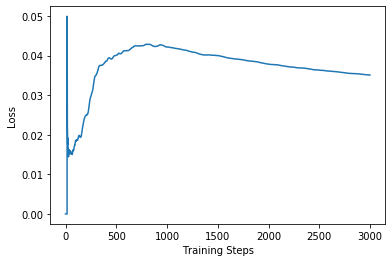

<Figure size 432x288 with 0 Axes>

In [7]:
# evaluate training
plot_losses(losses, 'losses-{}.png'.format(epochs), show=True)

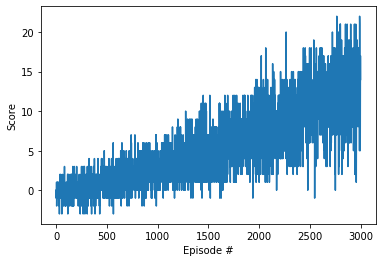

<Figure size 432x288 with 0 Axes>

In [8]:
plot_scores(scores, 'scores-{}.png'.format(epochs), show=True)

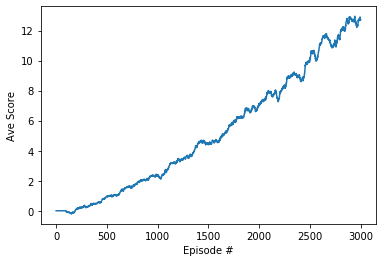

<Figure size 432x288 with 0 Axes>

In [9]:
plot_scores(average_scores, 'ave-scores-{}.png'.format(epochs), plotName='Ave Score', show=True)

Avg. score: 12.63, with a high of: 19.0


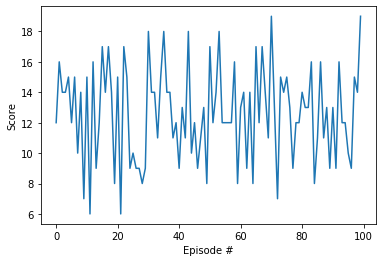

In [10]:
# test model
test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-{}.png'.format(attemps)

test_model(test_actor_env, attemps, filename, viewableSpeed=False)

In [11]:
env.close()